<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Chocolate Gummy Bears](#Q2)
    - Perceptron
    - Multilayer Perceptron
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:**
 neuron is a mathematical function, typically, it computes the weighted average of its input, and this sum is passed through an activation function to generate an output
- **Input Layer:**
It's the initial data for the neural network
- **Hidden Layer:**
A hidden layer is a layer in between input layers and output layers, where neurons take in a set of weighted inputs and produce an output through an activation function.
- **Output Layer:**
It is the final neuron/neurons which produces the result for given inputs
- **Activation:**
The activation function defines the strength of the output of that node given an input or set of inputs. Examples include Sigmoid, Relu, Softmax etc.
- **Backpropagation:**
It is a widely used algorithm in training feedforward neural networks. It  computes the gradient of the loss function with respect to the weights of the network.

## 2. Chocolate Gummy Bears <a id="Q2"></a>

Right now, you're probably thinking, "yuck, who the hell would eat that?". Great question. Your candy company wants to know too. And you thought I was kidding about the [Chocolate Gummy Bears](https://nuts.com/chocolatessweets/gummies/gummy-bears/milk-gummy-bears.html?utm_source=google&utm_medium=cpc&adpos=1o1&gclid=Cj0KCQjwrfvsBRD7ARIsAKuDvMOZrysDku3jGuWaDqf9TrV3x5JLXt1eqnVhN0KM6fMcbA1nod3h8AwaAvWwEALw_wcB). 

Let's assume that a candy company has gone out and collected information on the types of Halloween candy kids ate. Our candy company wants to predict the eating behavior of witches, warlocks, and ghosts -- aka costumed kids. They shared a sample dataset with us. Each row represents a piece of candy that a costumed child was presented with during "trick" or "treat". We know if the candy was `chocolate` (or not chocolate) or `gummy` (or not gummy). Your goal is to predict if the costumed kid `ate` the piece of candy. 

If both chocolate and gummy equal one, you've got a chocolate gummy bear on your hands!?!?!
![Chocolate Gummy Bear](https://ed910ae2d60f0d25bcb8-80550f96b5feb12604f4f720bfefb46d.ssl.cf1.rackcdn.com/3fb630c04435b7b5-2leZuM7_-zoom.jpg)

In [2]:
import pandas as pd
candy = pd.read_csv('chocolate_gummy_bears.csv')

In [3]:
candy.head()

,chocolate,gummy,ate
0,0,1,1
1,1,0,1
2,0,1,1
3,0,0,0
4,1,1,0


### Perceptron

To make predictions on the `candy` dataframe. Build and train a Perceptron using numpy. Your target column is `ate` and your features: `chocolate` and `gummy`. Do not do any feature engineering. :P

Once you've trained your model, report your accuracy. You will not be able to achieve more than ~50% with the simple perceptron. Explain why you could not achieve a higher accuracy with the *simple perceptron* architecture, because it's possible to achieve ~95% accuracy on this dataset. Provide your answer in markdown (and *optional* data anlysis code) after your perceptron implementation. 

In [29]:
# Start your candy perceptron here

X = candy[['chocolate', 'gummy']].values
y = candy['ate'].values

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

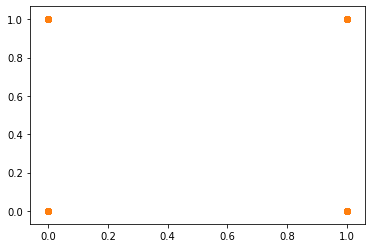

In [32]:
plt.scatter(X[:, 0], y)
plt.scatter(X[:, 1], y)
plt.show()

In [ ]:
#The accuracy of this single perceptron is going to low because the dataset is not Linear and Perceptrons are not good for that kind of data

In [31]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [32]:
pn = Perceptron(0.1, 100)
pn.fit(X, y)

In [52]:
len_x= len(X)
predictions = []

In [53]:
for i in range(0,len_x):
    predictions.append(pn.predict(X[i]))

In [33]:
print("Loss: \n" + str(np.mean(np.square(y - pn.predict(X))))) # mean sum squared loss

Loss: 
0.5


In [54]:
difference = y-predictions
print("Difference:", difference)
difference_squared = difference**2
print("Difference Squared:", difference_squared)
MSE = difference_squared.sum()/len(difference_squared)
print("Mean Squared Error", MSE)

Difference: [0 0 0 ... 0 0 0]
Difference Squared: [0 0 0 ... 0 0 0]
Mean Squared Error 0.5


### Multilayer Perceptron <a id="Q3"></a>

Using the sample candy dataset, implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. Your Multilayer Perceptron should be implemented in Numpy. 
Your network must have one hidden layer.

Once you've trained your model, report your accuracy. Explain why your MLP's performance is considerably better than your simple perceptron's on the candy dataset. 

In [37]:
class NeuralNetwork: 
    def __init__(self):
        # Set upArchietecture 
        self.inputs = 2
        self.hiddenNodes = 25
        self.outputNodes = 1
        #Initial weights
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes) #2x3
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes) #3x1
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    def sigmoidPrime(self, s):
        return s * (1 - s)
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        """
        #Weighted sume of inputs and hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        #Acivations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        #Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        return self.activated_output
    def backward(self, X, y, o):
        """
        Backward propagate through the network
        """
        self.o_error = y - o[:,0] #error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o[:,0]) # apply derivative of sigmoid to error
        self.o_delta = np.reshape(self.o_delta,[self.o_delta.shape[0], 1])
        self.z2_error = self.o_delta.dot(self.weights2.T) # z2 error: how much our hidden layer weights were off
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden)
        self.weights1 += X.T.dot(self.z2_delta) #Adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta) #adjust second set (hidden => output) weights
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [40]:
import numpy as np

nn = NeuralNetwork()

# Number of Epochs / Iterations
for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)

+---------EPOCH 1---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
Actual Output: 
 [1 1 1 ... 1 1 1]
Predicted Output: 
 [[0.99891047]
 [0.99681101]
 [0.99891047]
 ...
 [0.99891047]
 [0.99891047]
 [0.99681101]]
Loss: 
 0.4979400099327439
+---------EPOCH 2---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
Actual Output: 
 [1 1 1 ... 1 1 1]
Predicted Output: 
 [[1.19055409e-24]
 [2.82254091e-21]
 [1.19055409e-24]
 ...
 [1.19055409e-24]
 [1.19055409e-24]
 [2.82254091e-21]]
Loss: 
 0.5
+---------EPOCH 3---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
Actual Output: 
 [1 1 1 ... 1 1 1]
Predicted Output: 
 [[1.19055409e-24]
 [2.82254091e-21]
 [1.19055409e-24]
 ...
 [1.19055409e-24]
 [1.19055409e-24]
 [2.82254091e-21]]
Loss: 
 0.5
+---------EPOCH 4---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
Actual Output: 
 [1 1 1 ... 1 1 1]
Predicted Output: 
 [[1.19055409e-24]
 [2.82254091e-21]
 [1.19055409e-24]
 ...
 [1.19055409

In [39]:
print("Loss: \n" + str(np.mean(np.square(y - nn.feed_forward(X))))) # mean sum squared loss

Loss: 
0.5


In [ ]:
# This loss is supposed to be better since we are correcting the weights constantly, using back propogation algorithm to yield better results.

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1


In [4]:
X = df.values[:,0:13]
y = df.values[:,-1]

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
# Create Base Model
model = Sequential()
model.add(Dense(15,input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
#Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'accuracy'])
#fit model
model.fit(X,y, epochs=10)

Epoch 1/10
303/303 [==============================] - 0s 356us/sample - loss: 2.9628 - mean_squared_error: 2.9628 - acc: 0.4554
Epoch 2/10
303/303 [==============================] - 0s 43us/sample - loss: 0.9995 - mean_squared_error: 0.9995 - acc: 0.4488
Epoch 3/10
303/303 [==============================] - 0s 49us/sample - loss: 0.7292 - mean_squared_error: 0.7292 - acc: 0.4455
Epoch 4/10
303/303 [==============================] - 0s 46us/sample - loss: 0.6012 - mean_squared_error: 0.6012 - acc: 0.4422
Epoch 5/10
303/303 [==============================] - 0s 43us/sample - loss: 0.5393 - mean_squared_error: 0.5393 - acc: 0.4554
Epoch 6/10
303/303 [==============================] - 0s 43us/sample - loss: 0.5179 - mean_squared_error: 0.5179 - acc: 0.4620
Epoch 7/10
303/303 [==============================] - 0s 109us/sample - loss: 0.5001 - mean_squared_error: 0.5001 - acc: 0.4587
Epoch 8/10
303/303 [==============================] - 0s 43us/sample - loss: 0.4866 - mean_squared_error: 0.4

In [8]:
import numpy
import pandas as pd
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [12]:
#Tune Base Model on batch_size and epochs

def create_model():
    # create model
    model = Sequential()
    model.add(Dense(15,input_dim=13, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
# batch_size = [10, 20, 40, 60, 80, 100]
# param_grid = dict(batch_size=batch_size, epochs=epochs)

# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [20,50,100]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

C:\Users\test.NIDHNEMI\Anaconda3\envs\U4-S2-NN\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.7095709443092346 using {'batch_size': 10, 'epochs': 100}
Means: 0.49504952629407245, Stdev: 0.01400212435493574 with: {'batch_size': 10, 'epochs': 20}
Means: 0.5577557782332102, Stdev: 0.0901418982927951 with: {'batch_size': 10, 'epochs': 50}
Means: 0.7095709443092346, Stdev: 0.09334743013780726 with: {'batch_size': 10, 'epochs': 100}
Means: 0.5478547910849253, Stdev: 0.0648411903608231 with: {'batch_size': 20, 'epochs': 20}
Means: 0.5511551300684611, Stdev: 0.032671590713967885 with: {'batch_size': 20, 'epochs': 50}
Means: 0.6897689700126648, Stdev: 0.09369682889158953 with: {'batch_size': 20, 'epochs': 100}
Means: 0.43894390265146893, Stdev: 0.0382040845325417 with: {'batch_size': 40, 'epochs': 20}
Means: 0.5445544620354971, Stdev: 0.06103379510077917 with: {'batch_size': 40, 'epochs': 50}
Means: 0.5016501744588217, Stdev: 0.05259861470447439 with: {'batch_size': 40, 'epochs': 100}
Means: 0.43564356366793316, Stdev: 0.029147730442540223 with: {'batch_size': 60, 'epochs': 20}


In [22]:
#Tune Base Model on suggested batch_size and epochs, on optimizer

def create_model(optimizer = 'adam'):
    # create model
    model = Sequential()
    model.add(Dense(15,input_dim=13, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model,  epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

W0124 09:16:43.959601 16816 deprecation.py:506] From C:\Users\test.NIDHNEMI\Anaconda3\envs\U4-S2-NN\lib\site-packages\tensorflow\python\keras\optimizer_v2\adagrad.py:105: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Best: 0.7293729384740194 using {'optimizer': 'RMSprop'}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'optimizer': 'SGD'}
Means: 0.7293729384740194, Stdev: 0.12348703221579967 with: {'optimizer': 'RMSprop'}
Means: 0.5247524778048197, Stdev: 0.11404059928368775 with: {'optimizer': 'Adagrad'}
Means: 0.478547861178716, Stdev: 0.04452389737819455 with: {'optimizer': 'Adadelta'}
Means: 0.6336633662382761, Stdev: 0.12072171961352073 with: {'optimizer': 'Adam'}
Means: 0.6567656596501669, Stdev: 0.03820407080172275 with: {'optimizer': 'Adamax'}
Means: 0.6864686409632365, Stdev: 0.0246974223731781 with: {'optimizer': 'Nadam'}


In [23]:
#Tune Base Model on suggested batch_size, epochs, optimizer on activation function

def create_model(activation = 'relu'):
    # create model
    model = Sequential()
    model.add(Dense(15,input_dim=13, activation=activation))
    model.add(Dense(10, activation=activation))
    model.add(Dense(5, activation=activation))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model,  epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

W0124 09:29:25.016165 16816 deprecation.py:323] From C:\Users\test.NIDHNEMI\Anaconda3\envs\U4-S2-NN\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Best: 0.759075919787089 using {'activation': 'softsign'}
Means: 0.5841584205627441, Stdev: 0.042777153577535476 with: {'activation': 'softmax'}
Means: 0.5577557881673177, Stdev: 0.06779746687125664 with: {'activation': 'softplus'}
Means: 0.759075919787089, Stdev: 0.009334740203990824 with: {'activation': 'softsign'}
Means: 0.6567656993865967, Stdev: 0.10042985989191526 with: {'activation': 'relu'}
Means: 0.6501650015513102, Stdev: 0.01866948040798165 with: {'activation': 'tanh'}
Means: 0.6765676339467367, Stdev: 0.004667370101995413 with: {'activation': 'sigmoid'}
Means: 0.636963685353597, Stdev: 0.02333685050997706 with: {'activation': 'hard_sigmoid'}
Means: 0.5874587496121725, Stdev: 0.06279304264079835 with: {'activation': 'linear'}


In [25]:
#Tune Base Model on suggested batch_size, epochs, optimizer, activation function on dropout rate

from tensorflow.keras.layers import Dropout

def create_model(dropout_rate = '0.0'):
    # create model
    model = Sequential()
    model.add(Dense(15,input_dim=13, activation='softsign'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softsign'))
    model.add(Dense(5, activation='softsign'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model,  epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

W0124 09:38:17.667977 16816 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0124 09:38:33.692927 16816 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0124 09:38:49.352174 16816 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0124 09:39:05.225270 16816 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0124 09:39:22.716305 16816 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Best: 0.7623762488365173 using {'dropout_rate': 0.3}
Means: 0.7194719711939493, Stdev: 0.004667370101995412 with: {'dropout_rate': 0.0}
Means: 0.7161716222763062, Stdev: 0.03060602036578158 with: {'dropout_rate': 0.1}
Means: 0.6864686409632365, Stdev: 0.016828461706711845 with: {'dropout_rate': 0.2}
Means: 0.7623762488365173, Stdev: 0.04042061077191993 with: {'dropout_rate': 0.3}
Means: 0.6897689700126648, Stdev: 0.009334768301889833 with: {'dropout_rate': 0.4}
Means: 0.6765676538149515, Stdev: 0.02839052937741819 with: {'dropout_rate': 0.5}
Means: 0.669966995716095, Stdev: 0.03060602036578158 with: {'dropout_rate': 0.6}
Means: 0.6402640144030253, Stdev: 0.03267159071396789 with: {'dropout_rate': 0.7}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'dropout_rate': 0.8}
Means: 0.5445544719696045, Stdev: 0.021388576788767738 with: {'dropout_rate': 0.9}
